In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

 # xopt CNSGA2 function example
 
Experimental, using `pymoo` as a backend. 

In [2]:
from xopt.cmoo import cnsga2
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
NAME = 'TNK'
BOUND_LOW, BOUND_UP = [0.0, 0.0], [3.14159, 3.14159]  


X_RANGE = [0, 1.4]
Y_RANGE = [0, 1.4]

# Pure number version
def TNK(individual):    
    x1=individual[0]
    x2=individual[1]
    objectives =  (x1, x2)
    constraints = (x1**2+x2**2-1.0 - 0.1*np.cos(16*np.arctan2(x1, x2)), 0.5-(x1-0.5)**2-(x2-0.5)**2 )
    return objectives, constraints

# labeled version
def evaluate_TNK(inputs):
    
    info = {'some':'info', 'about':['the', 'run']}
    ind = [inputs['x1'], inputs['x2']]
    objectives, constraints = TNK(ind)    
    outputs = {'y1':objectives[0], 'y2':objectives[1], 'c1':constraints[0], 'c2':constraints[1]}
    
    return outputs

VOCS = {
    'name':'TNK_test',
    
    'variables': {
        'x1':[0, 3.14159],
        'x2':[0, 3.14159]
    },
    'objectives':{
        'y1':'MINIMIZE',
        'y2':'MINIMIZE'
        
    },
    'constraints':{
        'c1': ['GREATER_THAN', 0],
        'c2': ['GREATER_THAN', 0]
        
    },
    'constants':{'a':'dummy_constant'},
    'linked_variables':{'x9':'x1'}
    
    
}
TNK([0,0])

((0, 0), (-1.1, 0.0))

In [4]:
# Pick a parallel method

from concurrent.futures import ProcessPoolExecutor as PoolExecutor
#from concurrent.futures import ThreadPoolExecutor as PoolExecutor
executor = PoolExecutor()
#executor=None

In [5]:
problem, res = cnsga2(executor, vocs=VOCS, evaluate_f=evaluate_TNK,
            max_generations = 20, population_size=64, output_path=None,
            rolling_evaluate=True,
            verbose=True) 

evaluating all at once (64, 2)


In [6]:
pop_data = res.pop

In [7]:
problem2, res2 = cnsga2(executor, vocs=VOCS, population=pop_data, evaluate_f=evaluate_TNK,
            max_generations = 40, population_size=64, output_path=None,
            rolling_evaluate=True,                                       
            verbose=True) 

evaluating all at once (64, 2)


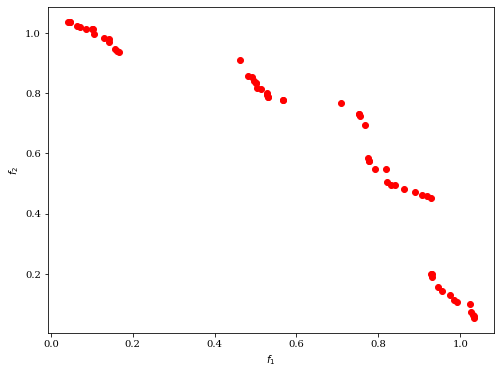

In [8]:
from pymoo.visualization.scatter import Scatter
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res2.F, color="red")
plot.show()